# Introduction to Text Data Preprocessing

Text data preprocessing is a fundamental step in preparing textual data for machine learning models and natural language processing (NLP) tasks. Raw text data often contains various inconsistencies, redundancies, and noise that can adversely affect the performance of models. Preprocessing the text data ensures that it is clean, consistent, and in a suitable format for analysis.

The key steps in text data preprocessing include:

1. **Tokenization**: Splitting text into individual words or tokens.
2. **Stemming**: Reducing words to their root form by removing suffixes.
3. **Lemmatization**: Converting words to their base or dictionary form.

These steps help in standardizing the text data, reducing its dimensionality, and making it more manageable for algorithms to process.


## Example

Consider the following raw text data:

**"The quick brown fox jumps over the lazy dog. The dogs are barking loudly in the yard."**

### Tokenization

Tokenization is the process of breaking down text into smaller units, called tokens. Tokens can be words, phrases, or even characters. In this example, we will tokenize the text into words:

**['The', 'quick', 'brown', 'fox', 'jumps', 'over', 'the', 'lazy', 'dog', '.', 'The', 'dogs', 'are', 'barking', 'loudly', 'in', 'the', 'yard', '.']**


### Stemming

Stemming is the process of reducing words to their root form. This helps in standardizing words with the same base meaning but different variations. Using a stemming algorithm like PorterStemmer, the tokens are reduced to their root forms:

**['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazi', 'dog', '.', 'the', 'dog', 'are', 'bark', 'loudli', 'in', 'the', 'yard', '.']**


### Lemmatization

Lemmatization is **similar to stemming** but aims to reduce words to their dictionary form. It uses the context and part of speech to accurately convert words to their base form. Using a lemmatizer, the tokens are converted to:

**['the', 'quick', 'brown', 'fox', 'jump', 'over', 'the', 'lazy', 'dog', '.', 'the', 'dog', 'be', 'bark', 'loudly', 'in', 'the', 'yard', '.']**

In [1]:
import nltk
import pandas as pd
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

In [2]:
# Download necessary NLTK data files
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to C:\Users\Aditya
[nltk_data]     Arya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Aditya
[nltk_data]     Arya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
# Sample text data
data = {
    'Text': [
        "The quick brown fox jumps over the lazy dog.",
        "The dogs are barking loudly in the yard.",
        "Running is a great exercise to keep yourself fit.",
        "Cats are wonderful companions for many people.",
        "I love programming and solving complex problems."
    ]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Display the original text data
print("Original Text Data:")
print(df)

Original Text Data:
                                                Text
0       The quick brown fox jumps over the lazy dog.
1           The dogs are barking loudly in the yard.
2  Running is a great exercise to keep yourself fit.
3     Cats are wonderful companions for many people.
4   I love programming and solving complex problems.


In [4]:
# Tokenization
df['Tokenized'] = df['Text'].apply(word_tokenize)
print(df['Tokenized'])

0    [The, quick, brown, fox, jumps, over, the, laz...
1    [The, dogs, are, barking, loudly, in, the, yar...
2    [Running, is, a, great, exercise, to, keep, yo...
3    [Cats, are, wonderful, companions, for, many, ...
4    [I, love, programming, and, solving, complex, ...
Name: Tokenized, dtype: object


In [5]:
# Stemming
stemmer = PorterStemmer()
df['Stemmed'] = df['Tokenized'].apply(lambda x: [stemmer.stem(word) for word in x])
print(df['Stemmed'])

0    [the, quick, brown, fox, jump, over, the, lazi...
1      [the, dog, are, bark, loudli, in, the, yard, .]
2    [run, is, a, great, exercis, to, keep, yoursel...
3    [cat, are, wonder, companion, for, mani, peopl...
4    [i, love, program, and, solv, complex, problem...
Name: Stemmed, dtype: object


In [6]:
# Lemmatization
lemmatizer = WordNetLemmatizer()
df['Lemmatized'] = df['Tokenized'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(df['Lemmatized'])

0    [The, quick, brown, fox, jump, over, the, lazy...
1    [The, dog, are, barking, loudly, in, the, yard...
2    [Running, is, a, great, exercise, to, keep, yo...
3    [Cats, are, wonderful, companion, for, many, p...
4    [I, love, programming, and, solving, complex, ...
Name: Lemmatized, dtype: object


<hr>

### Visualizations

To better understand the impact of these preprocessing steps, we can visualize the text data before and after preprocessing. ***Word clouds*** are a useful tool for this purpose, as they display the **most frequent words** in the text.

By understanding and applying these preprocessing techniques, you can improve the quality and effectiveness of your text-based models, ensuring that the data is in a suitable format for further analysis and machine learning tasks.

In [7]:
# Visualize the effect of preprocessing
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    print(f"{title}\n")
    plt.figure(figsize=(8, 3))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

In [8]:
# Combine tokenized words for visualization
original_text = df['Text'].str.cat(sep=' ')
tokenized_text = df['Tokenized'].sum()
stemmed_text = df['Stemmed'].sum()
lemmatized_text = df['Lemmatized'].sum()

Original Text



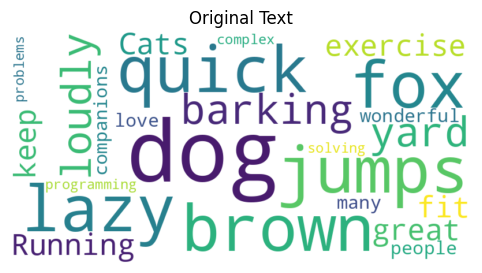

In [9]:
# Plot word clouds
plot_wordcloud(original_text.split(), 'Original Text')

Tokenized Text



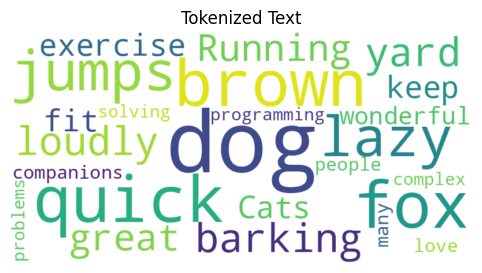

In [10]:
plot_wordcloud(tokenized_text, 'Tokenized Text')

Stemmed Text



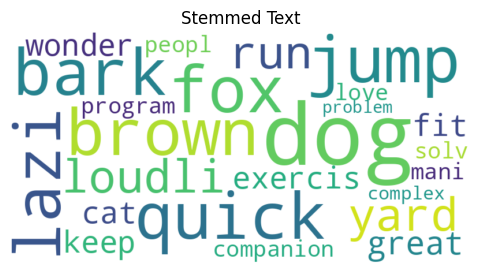

In [11]:
plot_wordcloud(stemmed_text, 'Stemmed Text')

Lemmatized Text



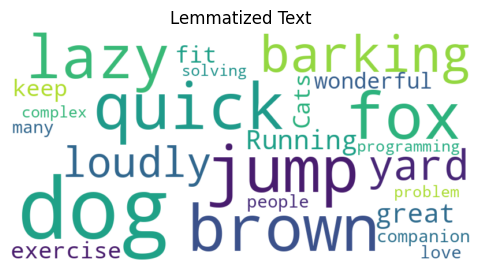

In [12]:
plot_wordcloud(lemmatized_text, 'Lemmatized Text')

In [13]:
# Display the processed text data
print("\nOriginal Text Data:")
print(df['Text'])

print("\nTokenized Text Data:")
print(df['Tokenized'])

print("\nStemmed Text Data:")
print(df['Stemmed'])

print("\nLemmatized Text Data:")
print(df['Lemmatized'])


Original Text Data:
0         The quick brown fox jumps over the lazy dog.
1             The dogs are barking loudly in the yard.
2    Running is a great exercise to keep yourself fit.
3       Cats are wonderful companions for many people.
4     I love programming and solving complex problems.
Name: Text, dtype: object

Tokenized Text Data:
0    [The, quick, brown, fox, jumps, over, the, laz...
1    [The, dogs, are, barking, loudly, in, the, yar...
2    [Running, is, a, great, exercise, to, keep, yo...
3    [Cats, are, wonderful, companions, for, many, ...
4    [I, love, programming, and, solving, complex, ...
Name: Tokenized, dtype: object

Stemmed Text Data:
0    [the, quick, brown, fox, jump, over, the, lazi...
1      [the, dog, are, bark, loudli, in, the, yard, .]
2    [run, is, a, great, exercis, to, keep, yoursel...
3    [cat, are, wonder, companion, for, mani, peopl...
4    [i, love, program, and, solv, complex, problem...
Name: Stemmed, dtype: object

Lemmatized Text Data:
0  

## Conclusion

Text data preprocessing is an essential step in the workflow of natural language processing (NLP) and machine learning. By systematically cleaning and transforming raw text data, we can significantly enhance the performance and accuracy of models. The primary techniques of tokenization, stemming, and lemmatization each play a crucial role in this process:

- **Tokenization** breaks down the text into manageable units, allowing for more precise analysis and manipulation.
- **Stemming** reduces words to their root forms, helping in the standardization of textual data.
- **Lemmatization** converts words to their base or dictionary form, ensuring that words with similar meanings are treated equivalently.

These preprocessing steps not only make the data more uniform but also reduce the complexity of the text, making it more suitable for analysis and modeling. By visualizing the text data before and after preprocessing, we can better appreciate the impact of these techniques and understand how they contribute to the overall effectiveness of text-based models.

In conclusion, mastering these preprocessing techniques is crucial for anyone working with text data, as it lays the foundation for building robust and efficient NLP and machine learnig models.
